# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
from scipy.stats import kde

# ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
#            "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
#            "cyan","khaki","lightcoral","gray"]
ColorsII = []
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
ColorsI = ["red","blue","green","purple",'C1','navy','darkred']
ColorsII = ['darkred','purple','green','blue']

In [3]:
# addressGev_Hubbrange="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e7_90000//output/";
addressGev_LargeBox="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e7_9000///output/";
addressGev_Midrange="./CSCS_Runs/Full_simulations_20March2019-1280Mpc/1280-cs_e7-w09-Kevolution/output//";
addressGev_Smallrange="./CSCS_Runs//Runs-28Jan2019/Kevolution//300Boxsize-cs_e7-w09-Kevolution///output/";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all=[]
Gev_lin_chi = []
Gev_lin_zeta_zall=[]
Gev_lin_Hpi_zall=[]
Gev_lin_delta_m_zall=[]
Gev_lin_phi_zall=[]
Gev_lin_phi_prime_zall=[]
Gev_cross_zall=[]
# Gev_lin_phi_prime_zall

# for i in range(zrange):
#     Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_pi_k.dat") )
#     Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_delta.dat") )
#     Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_phi.dat") )
#     Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_chi.dat") )

for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi_prime.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_chi.dat") )
for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_phi_prime.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_chi.dat") )

for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_phi_prime.dat") )
    Gev_cross_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_deltakess_deltam.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_chi.dat") )

Class_all=[]
Class_pk_all=[]

# # Backgrounds:
# bg_Gevolution_Hubblesize=np.loadtxt("./"+addressGev_HubbleBox+"/kess_cs_e2_w09_large_background.dat")
bg_Gevolution_lin_LargeBox=np.loadtxt("./"+addressGev_LargeBox+"/kess_cs_e2_w09_large_background.dat")
# bg_Gevolution_lin_midrange=np.loadtxt("./"+addressGev_Midrange+"/kess_cs_e2_w09_large_background.dat")

bg_class=np.loadtxt("./Class_Gev_IC/class_cs2_07_w09/Output/class_kess_cs_e7_w_09_newt_background.dat")
Class_all=[]
Class_phi_prime=[]
# Class_pk_all=[]
# zlist_class=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
# zlist_class=zlist
zlist_class=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])

# zlist_phiprime=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
class_high="./Class_Gev_IC/class_cs2_07_w09/";

for i in range(np.shape(zlist_class)[0]):
    Class_all.append(np.loadtxt(class_high+"/Class_kess_cs2_e7_w_09_z"+str(zlist_class[i])+"_newt.dat"))
    #     Class_pk_all.append(np.loadtxt(class_high+"/class_kess_cs_e3_newt_z"+str(i+1)+"_pk.dat"))
# for i in range(np.shape(zlist_phiprime)[0]):    
#     Class_phi_prime.append(np.loadtxt(class_high+"/Class_cs_e3_w0.9/Kessence_field_class_phi_prime_z"+str(zlist_phiprime[i])+".dat"))
maxNum=np.shape(zlist_class)[0]

z_list=zlist_class

# Background test

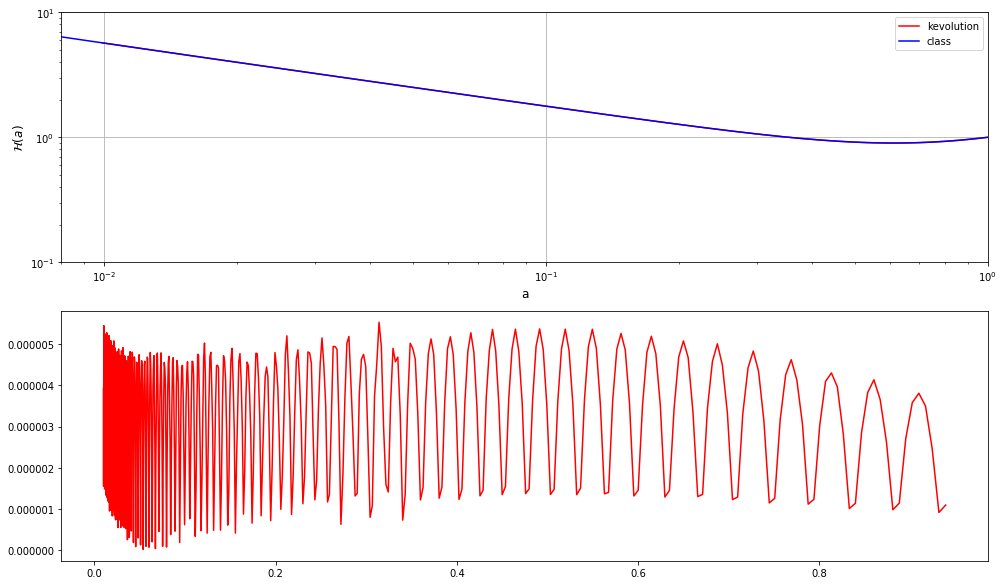

In [4]:
#################################
#################################
# Cosmological parameters.

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
H_list=[]
a_list=1./(1.+zlist)
Class_Phi_power_zall=[]

H_list=(Hubble_conf_Mpc(1./(1.+zlist[i])))
#     Class_Phi_power_zall.append(As*(class_phi_kess_zall[i][:,7])**2 *((class_phi_kess_zall[i][:,0]/kp)**(ns-1.)) );
# np.shape(Class_Phi_power_zall)

#Plot setting
plt.figure(figsize=(14,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 13)
plt.subplot(211)
#plt.loglog(bg_Gevolution_lin[:,2],2.*np.abs(np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))-bg_Gevolution_lin[:,3])/(bg_Gevolution_lin[:,3]+np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))),".",color="olive",
#           label=r"2|$\frac{\mathcal{H}(fluid)-\mathcal{H}(field)}{\mathcal{H}(fluid)+\mathcal{H}(field)}|$")
aclass_cs_e3=1./(1+bg_class[:,0])
a=np.arange(0.001,2,0.0001)
plt.loglog(bg_Gevolution_lin_LargeBox[:,2],bg_Gevolution_lin_LargeBox[:,3],color="red",
           label="kevolution")
plt.plot(aclass_cs_e3,bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.),color="blue",
           label="class")
plt.xlim(8e-3,1)
plt.ylim(1e-1,10)
plt.xlabel("a",fontsize=12)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=12)
# plt.ylabel('log')
# plt.xlabel('log')

plt.legend()
plt.grid(True)
plt.tight_layout()

Hubble_interp=[]
interp_Hubble=(interp1d(aclass_cs_e3[:],bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.)) )
Hubble_interp=(interp_Hubble(bg_Gevolution_lin_LargeBox[:-10,2]) )

plt.subplot(212)
plt.plot(bg_Gevolution_lin_LargeBox[:-10,2],np.abs(bg_Gevolution_lin_LargeBox[:-10,3]-Hubble_interp[:])/Hubble_interp[:],color="red",label="fluid")
# plt.ylim(-1e-7,1e-7)

plt.show()

In [5]:
class_zall_interp_deltam_Hubble=[]
class_zall_interp_deltam_LargeBox=[]
class_zall_interp_deltam_Mid=[]

class_zall_interp_deltakess_Hubble=[]
class_zall_interp_deltakess_LargeBox=[]
class_zall_interp_deltakess_Mid=[]

class_zall_interp_phi_Hubble=[]
class_zall_interp_phi_LargeBox=[]
class_zall_interp_phi_Mid=[]

class_zall_interp_phi_prime_Hubble=[]
class_zall_interp_phi_prime_LargeBox=[]
class_zall_interp_phi_prime_Mid=[]

for i in range(0,zrange):
    interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
    interp_class_deltam_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
    interp_class_deltam_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )

    interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
    interp_class_deltakess_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
    interp_class_deltakess_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )

    interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    interp_class_phi_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    interp_class_phi_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    
#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

    class_zall_interp_deltam_Hubble.append(interp_class_deltam(Gev_lin_delta_m_zall[i][:,0]))
    class_zall_interp_deltam_LargeBox.append(interp_class_deltam(Gev_lin_delta_m_zall[i+zrange][:,0]))
    class_zall_interp_deltam_Mid.append(interp_class_deltam(Gev_lin_delta_m_zall[i+22][:,0]) )

    class_zall_interp_deltakess_Hubble.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i][:,0]) )
    class_zall_interp_deltakess_LargeBox.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+zrange][:,0]) )
    class_zall_interp_deltakess_Mid.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+22][:,0]) )

    class_zall_interp_phi_Hubble.append(interp_class_phi(Gev_lin_phi_zall[i][:,0]) )
    class_zall_interp_phi_LargeBox.append(interp_class_phi(Gev_lin_phi_zall[i+zrange][:,0]) )
    class_zall_interp_phi_Mid.append(interp_class_phi(Gev_lin_phi_zall[i+22][:zrange,0]) )

#     class_zall_interp_phi_prime_Hubble.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i][:,0]) )
#     class_zall_interp_phi_prime_LargeBox.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+11][:,0]) )
#     class_zall_interp_phi_prime_Mid.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+22][:,0]) )

# Making mu2

In [6]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s

H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class_mid=[]
mu_kev_mid=[]
mu_class_large=[]
mu_kev_large=[]
mu_class_Hubble=[]
mu_kev_Hubble=[]


# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range (maxNum):
     #Hubble
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+np.abs(coeff*class_zall_interp_deltakess_Hubble[i][:]/class_zall_interp_deltam_Hubble[i][:])
    mu_class_Hubble.append(mu_class0);
    
    
    mu_kev0=  1.+ np.abs(coeff*np.sqrt(Gev_lin_deltakess_z_all[i][:,1])/np.sqrt(Gev_lin_delta_m_zall[i][:,1]))
    mu_kev_Hubble.append(mu_kev0)
    
    
    #Large
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_LargeBox[i][:]/class_zall_interp_deltam_LargeBox[i][:])
    mu_class_large.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange][:,1]))
    mu_kev_large.append(mu_kev0)
    
# #     #mid range
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_Mid[i][:]/class_zall_interp_deltam_Mid[i][:])
    mu_class_mid.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange*2][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange*2][:,1]))
    mu_kev_mid.append(mu_kev0)
    
    
    

In [7]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s

H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class_mid=[]
mu_kev_mid=[]
mu_class_large=[]
mu_kev_large=[]
mu_class_Hubble=[]
mu_kev_Hubble=[]


# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range (maxNum):
     #Hubble
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+np.abs(coeff*class_zall_interp_deltakess_Hubble[i][:]/class_zall_interp_deltam_Hubble[i][:])
    mu_class_Hubble.append(mu_class0);
    
    
    mu_kev0=  1.+ np.abs(coeff*np.sqrt(Gev_lin_deltakess_z_all[i][:,1])/np.sqrt(Gev_lin_delta_m_zall[i][:,1]))
    mu_kev_Hubble.append(mu_kev0)
    
    
    #Large
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_LargeBox[i][:]/class_zall_interp_deltam_LargeBox[i][:])
    mu_class_large.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange][:,1]))
    mu_kev_large.append(mu_kev0)
    
# #     #mid range
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_Mid[i][:]/class_zall_interp_deltam_Mid[i][:])
    mu_class_mid.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange*2][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange*2][:,1]))
    mu_kev_mid.append(mu_kev0)

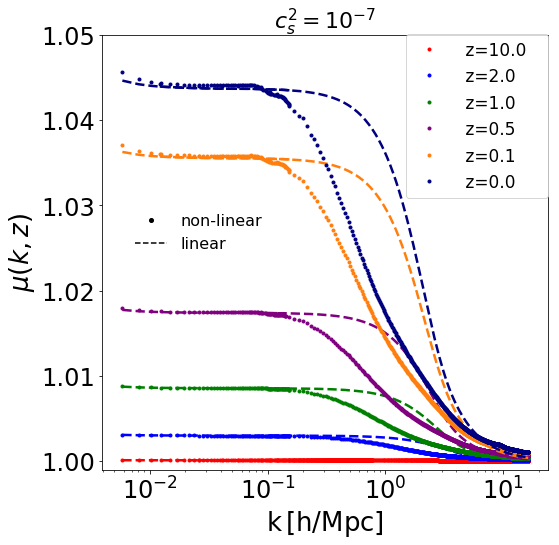

In [8]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class=[]
mu_kev=[]
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))

l=0
c_s=np.sqrt(1.e-7)
kmax=100
variance_large=2
figs_label=[]
for i in [3,8,9,14,18,30]:
# for i in [14,18,30]:

    if i==3:
        variance_mid=1
        variance_small=80
        kmax_skip_l=3
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)

    if i==8:
#         variance_large=1
        variance_mid=6
        variance_small=80
        kmax_skip_l=15
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        
    if i==9:
#         variance_large=1
        variance_mid=5
        variance_small=80
        kmax_skip_l=15
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        
    if i==14:
#         variance_large=1
        variance_mid=4
        variance_small=80
        kmax_skip_l=16
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
    if i==18:
#         variance_large=1
        variance_mid=0
        variance_small=80
        kmax_skip_l=15.0
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        
        
    if i==30:
#         variance_large=1
        variance_mid=0
        variance_small=80
        kmax_skip_l=15.0
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
    ksound=H_list[i]/c_s/h;
#     x=1
    plt.plot(Gev_lin_phi_zall[i][variance_large:kmax_num_l,0], mu_kev_Hubble[i][variance_large:kmax_num_l],".",color=ColorsI[l],lw=2.5, label=r" z="+str(z_list[i]))
    plt.plot(Gev_lin_phi_zall[i][variance_large:kmax_num_l,0], mu_class_Hubble[i][variance_large:kmax_num_l],color=ColorsI[l],linestyle='dashed',lw=2.5)

    plt.plot(Gev_lin_phi_zall[i+zrange][variance_mid:,0], mu_kev_large[i][variance_mid:],".",color=ColorsI[l],lw=1.5)
    plt.plot(Gev_lin_phi_zall[i+zrange][variance_mid:,0], mu_class_large[i][variance_mid:],color=ColorsI[l],linestyle='dashed',lw=2.5)
#     plt.plot(Gev_lin_phi_zall[i+zrange*2][variance_small:kmax_num_s,0], mu_kev_mid[i][variance_small:kmax_num_s],color=ColorsI[l],linestyle='solid',lw=2.5)
#     plt.plot(Gev_lin_phi_zall[i+zrange*2][variance_small:kmax_num_s,0], mu_class_mid[i][variance_small:kmax_num_s],color=ColorsI[l],linestyle='dashed',lw=2.5)
#     plt.axvline(x=H_list[i]/c_s/h,color=ColorsI[l])    
    l=l+1

#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
plt.legend(bbox_to_anchor=(0.68, 0.90,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
plt.xlabel(r"$\rm{k}\,$[$\rm{h}$/Mpc]",fontsize=26)
plt.ylabel(r"$\mu(k,z)$",fontsize=26)
plt.title( r"$c_s^2 =10^{-7}$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')
# plt.savefig('mu_cs7_w09.jpg', format='jpg',dpi=400, bbox_inches='tight' )
from matplotlib.legend import Legend
figs_label+=ax.semilogx(0,0,".",color="black", markersize=8,label=r"Short-wave correcttion" ) 
figs_label+=ax.semilogx(0,0,linestyle='dashed',color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# figs_label+=ax.semilogx(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

leg=Legend(ax,figs_label[:],[r"non-linear","linear"],bbox_to_anchor=(0.15, 0.52, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
#              loc='lower right', frameon=False)
ax.add_artist(leg);
plt.ylim(0.999,1.05)

plt.savefig('mu_cs2_e7.pdf', format='pdf',dpi=300, bbox_inches='tight' )

# plt.grid(True)
plt.show()


# Fitting Tanh

In [17]:
from scipy.optimize import curve_fit
# from scipy import optimize
Best_fits=[]
k_min=1
init_vals = [  0.025,  2.2,-1.26];  # for [amp, cen, wid]
for i in range (zrange):# for [amp, cen, wid]
    def tanhyp(x,alpha, beta, gamma):
        return -alpha*(np.tanh(beta*(np.log10(x) -gamma))) +alpha 
    best_vals, covar = curve_fit(tanhyp, (Gev_lin_phi_zall[i][k_min:,0]), mu_kev_Hubble[i][k_min:]-1, p0=init_vals)
    Best_fits.append(best_vals)
    #     print(best_vals)


/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in tanh
  


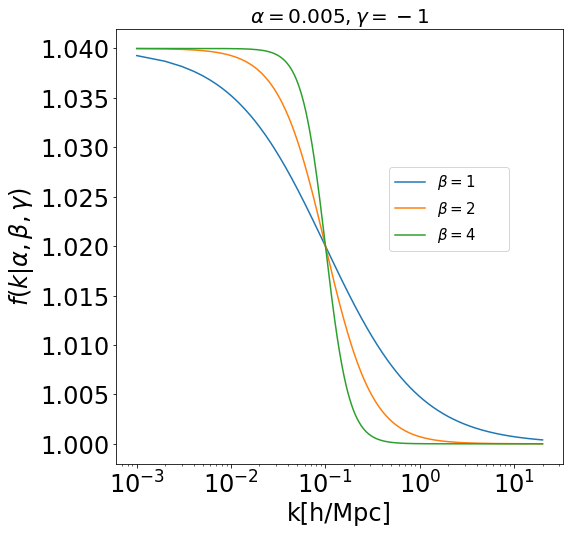

In [122]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)

a=np.arange(0,20,0.001)
alpha=0.02
gamma=-1
beta=1
plt.semilogx(a,1+tanhyp(a,alpha, beta, gamma),label=r"$\beta=1$")
beta=2
plt.semilogx(a,1+tanhyp(a,alpha, beta, gamma),label=r"$\beta=2$")
beta=4
plt.semilogx(a,1+tanhyp(a,alpha, beta, gamma),label=r"$\beta=4$")

# beta=-1
# plt.plot(a,tanhyp(a,alpha, beta, gamma),label=r"($\alpha,\beta,\gamma$)=(2,-1,-0.3)")
plt.ylabel(r"$f(k|\alpha,\beta,\gamma) $",fontsize=24)
plt.xlabel("k[h/Mpc]",fontsize=24)
plt.title(r"$\alpha=0.005, \gamma = -1$",fontsize=20)
plt.legend(bbox_to_anchor=(0.61, 0.58,0.27, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.savefig('tanh_parametrization_beta.pdf', format='pdf',dpi=300, bbox_inches='tight' )

plt.show()

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in tanh
  


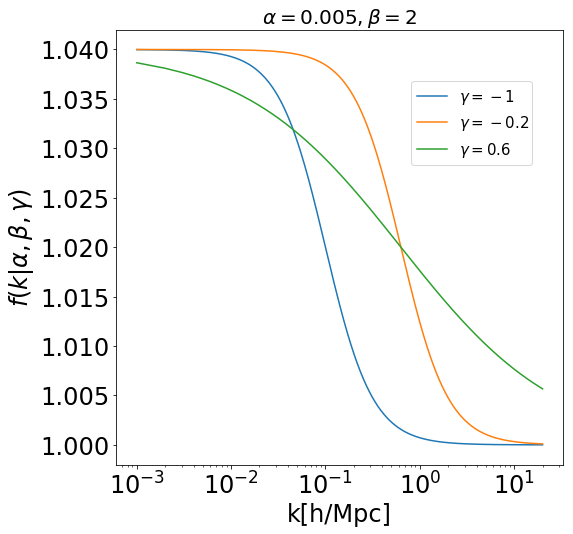

In [123]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)

a=np.arange(0,20,0.001)
alpha=0.02
beta=2

gamma=-1
plt.semilogx(a,1+tanhyp(a,alpha, beta, gamma),label=r"$\gamma=-1$")
gamma=-0.2
plt.semilogx(a,1+tanhyp(a,alpha, beta, gamma),label=r"$\gamma=-0.2$")
beta=0.6
plt.semilogx(a,1+tanhyp(a,alpha, beta, gamma),label=r"$\gamma=0.6$")

# beta=-1
# plt.plot(a,tanhyp(a,alpha, beta, gamma),label=r"($\alpha,\beta,\gamma$)=(2,-1,-0.3)")
plt.ylabel(r"$f(k|\alpha,\beta,\gamma) $",fontsize=24)
plt.xlabel("k[h/Mpc]",fontsize=24)
plt.title(r"$\alpha=0.005, \beta = 2$",fontsize=20)
plt.legend(bbox_to_anchor=(0.66, 0.78,0.27, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.savefig('tanh_parametrization_gamma.pdf', format='pdf',dpi=300, bbox_inches='tight' )

plt.show()

# Class fitting

In [63]:
k_min=12

Best_fits_class=[]
# Gev_lin_phi_zall[i][k_min:],mu_class_Hubble[i][k_min:]-1
for i in range (zrange):
    init_vals_2 =[  0.022,  2.85,0.28];  # for [amp, cen, wid]
#     def tanhyp(x,alpha, beta, gamma):
#         return -alpha*(np.tanh(beta*(np.log10(x) -gamma))) +alpha 
    best_vals, covar = curve_fit(tanhyp, (Gev_lin_phi_zall[i][k_min:,0]), mu_class_Hubble[i][k_min:]-1, p0=init_vals_2)
    Best_fits_class.append(best_vals)
    #     print(best_vals)


In [64]:
Best_fits_class = np.array(Best_fits_class)
Best_fits = np.array(Best_fits)

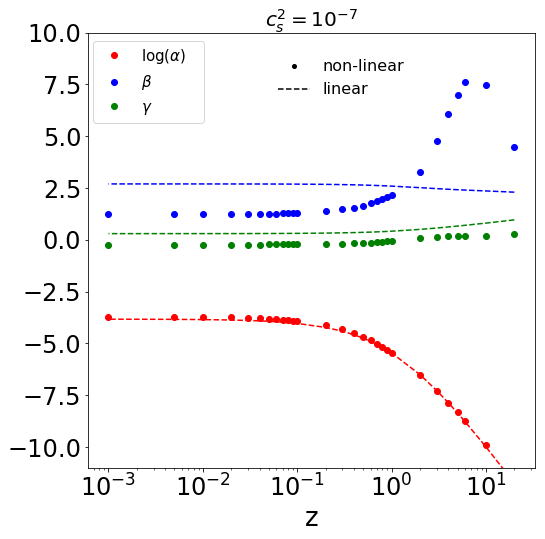

In [83]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot((z_list[kk:]),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot((z_list[kk:]),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot((z_list[kk:]),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot((z_list[kk:]),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot((z_list[kk:]),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot((z_list[kk:]),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.88,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-11,10)

plt.xlabel(r"$\rm z$",fontsize=26)
plt.xscale('log')
# plt.yscale('log')
plt.title("$c_s^2=10^{-7}$",fontsize=20)
from matplotlib.legend import Legend
figs_label+=ax.semilogx(0,0,".",color="black", markersize=8,label=r"Short-wave correcttion" ) 
figs_label+=ax.semilogx(0,0,linestyle='dashed',color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# figs_label+=ax.semilogx(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

leg=Legend(ax,figs_label[:],[r"non-linear","linear"],bbox_to_anchor=(0.5, 0.87, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
#              loc='lower right', frameon=False)
ax.add_artist(leg);

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('fitting_parameters_mu_cs2_e7.pdf', format='pdf',dpi=300, bbox_inches='tight' )

plt.show()

In [82]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# ####
# fig= plt.figure(figsize=(8,8))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.figure(1)
# # kk=0
# kk=2
# plt.plot((z_list[kk:]),(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
# plt.plot((z_list[kk:]),np.log(Best_fits[kk:,1]),"o",label=r"$\beta$",lw=1.5,color="blue")
# plt.plot((z_list[kk:]),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

# plt.plot((z_list[kk:]),(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
# plt.plot((z_list[kk:]),np.log(Best_fits_class[kk:,1]),lw=1.5,linestyle='dashed',color="blue")
# plt.plot((z_list[kk:]),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# # axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# # axins.imshow(Z2, extent=extent, interpolation="nearest",
# #              origin="lower")
# plt.legend(bbox_to_anchor=(0.01, 0.88,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.ylim(-0.5,2.2)

# plt.xlabel(r"$\rm z$",fontsize=26)
# plt.xscale('log')
# # plt.yscale('log')
# plt.title("$c_s^2=10^{-7}$",fontsize=20)
# from matplotlib.legend import Legend
# figs_label+=ax.semilogx(0,0,".",color="black", markersize=8,label=r"Short-wave correcttion" ) 
# figs_label+=ax.semilogx(0,0,linestyle='dashed',color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# # figs_label+=ax.semilogx(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

# leg=Legend(ax,figs_label[:],[r"non-linear","linear"],bbox_to_anchor=(0.5, 0.87, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
# #              loc='lower right', frameon=False)
# ax.add_artist(leg);

# # plt.loglog(1+z_list[:],Best_fits_class[:,1])
# # plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# # plt.legend()
# # plt.savefig('mu_cs2_e7.pdf', format='pdf',dpi=300, bbox_inches='tight' )

# plt.show()

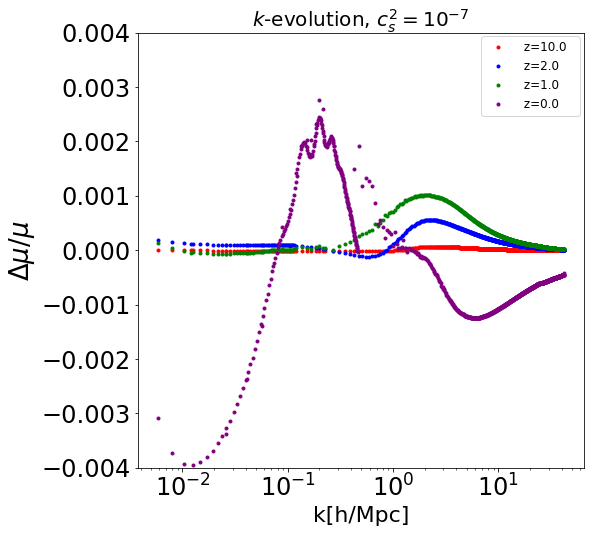

In [130]:

l=0

plt.figure(figsize=(8,8))
ax = plt.gca()
k_min=4
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in [3,8,9,30]:
# for i in [9]:

    variance_large=2
    variance_mid=0
    variance_s=5
    kmax_skip_l=20
    kmax_skip_m=70
    kmax_skip_s=0.1
    kmax_num_l=np.int(1024/kmax_skip_l)
    kmax_num_m=np.int(1024/kmax_skip_m)    
    kmax_num_s=np.int(1024/kmax_skip_s)  
    [alpha, beta, gamma]=Best_fits[i]
    if(i==30):
        variance_large=2
        variance_mid=1
        variance_s=10

        kmax_skip_l=5
        kmax_skip_m=70
        kmax_skip_s=0.1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_s=np.int(1024/kmax_skip_s)    
        x=Gev_lin_phi_zall[i][variance_large:kmax_num_l,0];
        plt.plot(x, (mu_kev_Hubble[i][variance_large:kmax_num_l]-(tanhyp(x,alpha, beta, gamma)+1))/mu_kev_Hubble[i][variance_large:kmax_num_l],".",lw=2.5,color=ColorsI[l],label=r" z="+str(z_list[i]))
        y=(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0]);
        plt.plot(y, (mu_kev_large[i][variance_mid:kmax_num_m]-(tanhyp(y,alpha, beta, gamma)+1))/mu_kev_large[i][variance_mid:kmax_num_m],".",lw=2.5,color=ColorsI[l])
       
        gg=(Gev_lin_phi_zall[i+zrange*2][variance_s:kmax_num_s,0]);
        plt.plot(gg, (mu_kev_mid[i][variance_s:kmax_num_s]-(tanhyp(gg,alpha, beta, gamma)+1))/mu_kev_mid[i][variance_s:kmax_num_s],".",lw=2.5,color=ColorsI[l])
    else:
        x=Gev_lin_phi_zall[i][variance_large:kmax_num_l,0];
        [alpha, beta, gamma]=Best_fits[i]
        plt.plot(x, (mu_kev_Hubble[i][variance_large:kmax_num_l]-(tanhyp(x,alpha, beta, gamma)+1))/mu_kev_Hubble[i][variance_large:kmax_num_l],".",lw=2.5,color=ColorsI[l],label=r" z="+str(z_list[i]))

        y=(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0]);
        plt.plot(y, (mu_kev_large[i][variance_mid:kmax_num_m]-(tanhyp(y,alpha, beta, gamma)+1))/mu_kev_large[i][variance_mid:kmax_num_m],".",lw=2.5,color=ColorsI[l])
        
        gg=(Gev_lin_phi_zall[i+zrange*2][variance_s:kmax_num_s,0]);
        plt.plot(gg, (mu_kev_mid[i][variance_s:kmax_num_s]-(tanhyp(gg,alpha, beta, gamma)+1))/mu_kev_mid[i][variance_s:kmax_num_s],".",lw=2.5,color=ColorsI[l])
 
#     plt.plot(Gev_lin_phi_zall[i+zrange*2][variance_small:kmax_num_s,0], mu_class_mid[i][variance_small:kmax_num_s],color=ColorsI[l],linestyle='dashed',lw=2.5)

    l=l+1
ax.legend(bbox_to_anchor=(0.77, 0.89,0.22, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)

plt.title( r"$k$-evolution, $c_s^2 =10^{-7}$",fontsize=20)

plt.xlabel("k[h/Mpc]",fontsize=22)
plt.ylabel(r"$\Delta\mu/\mu$",fontsize=26)
plt.xscale('log')
plt.ylim(-0.004,0.004)
# plt.savefig('res_cs2_7_kev.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()


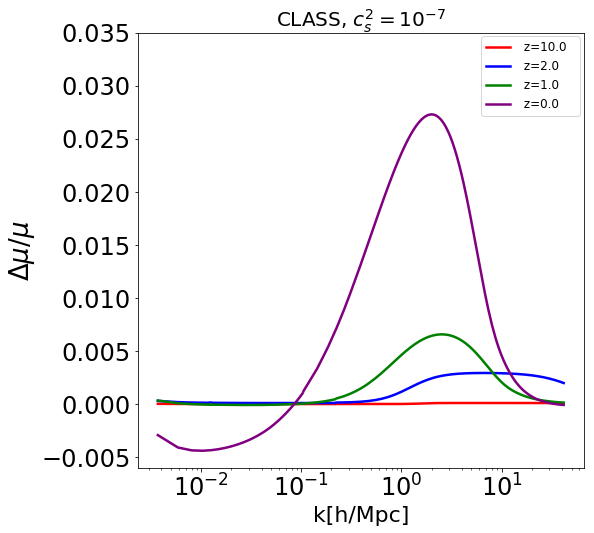

In [131]:

l=0

plt.figure(figsize=(8,8))
ax = plt.gca()
k_min=4
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in [3,8,9,30]:
# for i in [9]:

    variance_large=1
    variance_mid=0
    variance_s=5
    kmax_skip_l=160
    kmax_skip_m=70
    kmax_skip_s=0.1
    kmax_num_l=np.int(1024/kmax_skip_l)
    kmax_num_m=np.int(1024/kmax_skip_m)    
    kmax_num_s=np.int(1024/kmax_skip_s)  
    [alpha, beta, gamma]=Best_fits[i]
    if(i==30):
        variance_large=1
        variance_s=2
        kmax_skip_l=21.8
        kmax_skip_s=0.1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_s=np.int(1024/kmax_skip_s)    
        x=Gev_lin_phi_zall[i][variance_large:kmax_num_l,0];
        plt.plot(x, (mu_class_Hubble[i][variance_large:kmax_num_l]-(tanhyp(x,alpha, beta, gamma)+1))/mu_class_Hubble[i][variance_large:kmax_num_l],"-",lw=2.5,color=ColorsI[l],label=r" z="+str(z_list[i]))

        gg=(Gev_lin_phi_zall[i+zrange*2][variance_s:kmax_num_s,0]);
        plt.plot(gg, (mu_class_mid[i][variance_s:kmax_num_s]-(tanhyp(gg,alpha, beta, gamma)+1))/mu_class_mid[i][variance_s:kmax_num_s],"-",lw=2.5,color=ColorsI[l])
    else:
        x=Gev_lin_phi_zall[i][variance_large:kmax_num_l,0];
        [alpha, beta, gamma]=Best_fits[i]
        plt.plot(x, (mu_class_Hubble[i][variance_large:kmax_num_l]-(tanhyp(x,alpha, beta, gamma)+1))/mu_class_Hubble[i][variance_large:kmax_num_l],"-",lw=2.5,color=ColorsI[l],label=r" z="+str(z_list[i]))

        y=(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0]);
        plt.plot(y, (mu_class_large[i][variance_mid:kmax_num_m]-(tanhyp(y,alpha, beta, gamma)+1))/mu_class_large[i][variance_mid:kmax_num_m],"-",lw=2.5,color=ColorsI[l])
        
        gg=(Gev_lin_phi_zall[i+zrange*2][variance_s:kmax_num_s,0]);
        plt.plot(gg, (mu_class_mid[i][variance_s:kmax_num_s]-(tanhyp(gg,alpha, beta, gamma)+1))/mu_class_mid[i][variance_s:kmax_num_s],"-",lw=2.5,color=ColorsI[l])
 
#     plt.plot(Gev_lin_phi_zall[i+zrange*2][variance_small:kmax_num_s,0], mu_class_mid[i][variance_small:kmax_num_s],color=ColorsI[l],linestyle='dashed',lw=2.5)

    l=l+1
ax.legend(bbox_to_anchor=(0.77, 0.89,0.22, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)

plt.title( r"CLASS, $c_s^2 =10^{-7}$",fontsize=20)
plt.ylim(-0.006,0.035)

plt.xlabel("k[h/Mpc]",fontsize=22)
plt.ylabel(r"${\Delta\mu}/{\mu}$",fontsize=26)
plt.xscale('log')
# plt.yscale('symlog')
# plt.savefig('res_cs2_7_class.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()


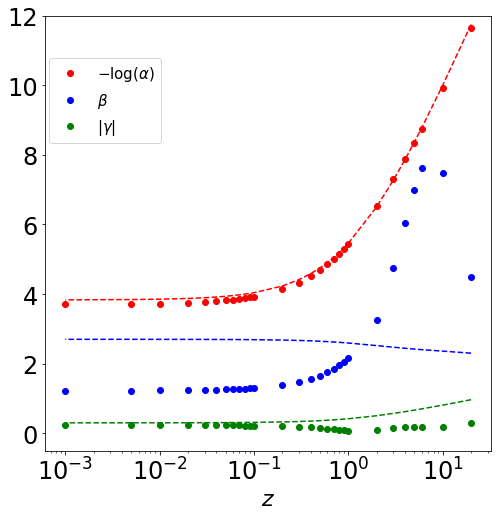

In [49]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot((z_list[kk:]),-np.log(Best_fits[kk:,0]),"o",label=r"$- \log(\alpha)$",lw=1.5,color="red")
plt.plot((z_list[kk:]),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot((z_list[kk:]),np.abs(Best_fits[kk:,2]),"o",label=r"$|\gamma|$",lw=1.5,color="green")

plt.plot((z_list[kk:]),-np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot((z_list[kk:]),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot((z_list[kk:]),np.abs(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.80,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-0.5,12)

plt.xlabel(r"$z$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('fitting_cs2_7_values.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

# Log alpha vs beta

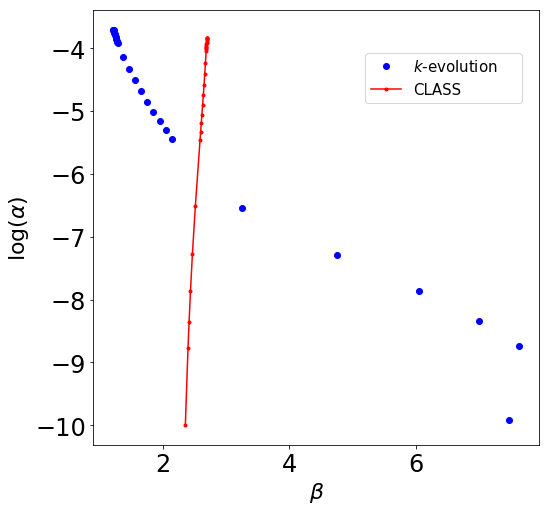

In [84]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=3
plt.plot(Best_fits[kk:,1],np.log(Best_fits[kk:,0]),"o",label=r"$k$-evolution",lw=1.5,color="blue")
plt.plot(Best_fits_class[kk:,1],np.log(Best_fits_class[kk:,0]),".-",lw=1.5,label=r"CLASS",color="red")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.61, 0.80,0.35, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.ylim(-0.5,12)

plt.xlabel(r"$\beta$",fontsize=22)
plt.ylabel(r"$\log(\alpha)$",fontsize=22)

# plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('logalpha_beta_cs2_7.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

# Log alpha vs gamma

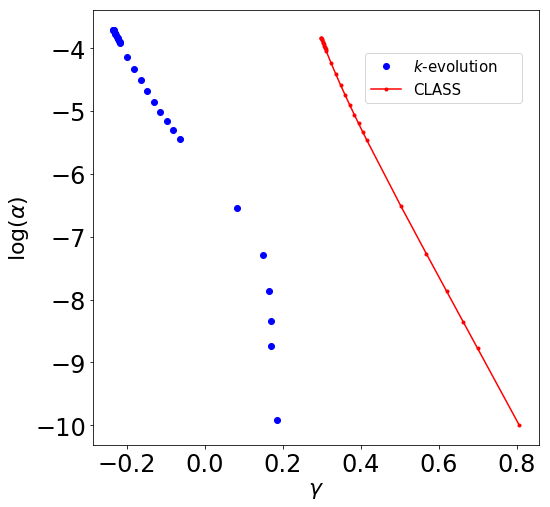

In [53]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=3
plt.plot(Best_fits[kk:,2],np.log(Best_fits[kk:,0]),"o",label=r"$k$-evolution",lw=1.5,color="blue")
plt.plot(Best_fits_class[kk:,2],np.log(Best_fits_class[kk:,0]),".-",lw=1.5,label=r"CLASS",color="red")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.61, 0.80,0.35, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.ylim(-0.5,12)

plt.xlabel(r"$\gamma$",fontsize=22)
plt.ylabel(r"$\log(\alpha)$",fontsize=22)

# plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('logalpha_gamma_cs2_7.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

# beta vs gamma

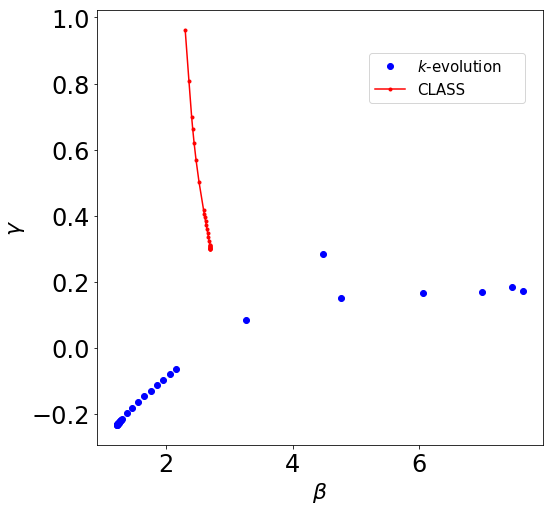

In [55]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot(Best_fits[kk:,1],Best_fits[kk:,2],"o",label=r"$k$-evolution",lw=1.5,color="blue")
plt.plot(Best_fits_class[kk:,1],Best_fits_class[kk:,2],".-",lw=1.5,label=r"CLASS",color="red")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.61, 0.80,0.35, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.ylim(-0.5,12)

plt.xlabel(r"$\beta$",fontsize=22)
plt.ylabel(r"$\gamma$",fontsize=22)

# plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('beta_gamma_cs2_7.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

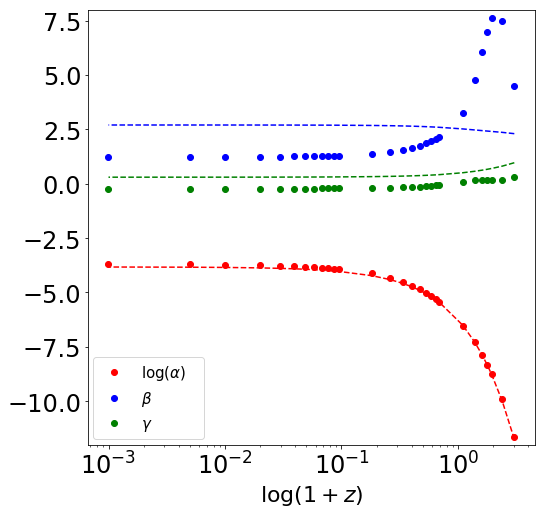

In [56]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot(np.log(z_list[kk:]+1),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot(np.log(z_list[kk:]+1),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot(np.log(z_list[kk:]+1),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot(np.log(z_list[kk:]+1),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot(np.log(z_list[kk:]+1),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot(np.log(z_list[kk:]+1),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,8)

plt.xlabel(r"$\log(1+z)$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('fitting_cs2_7_values_1.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

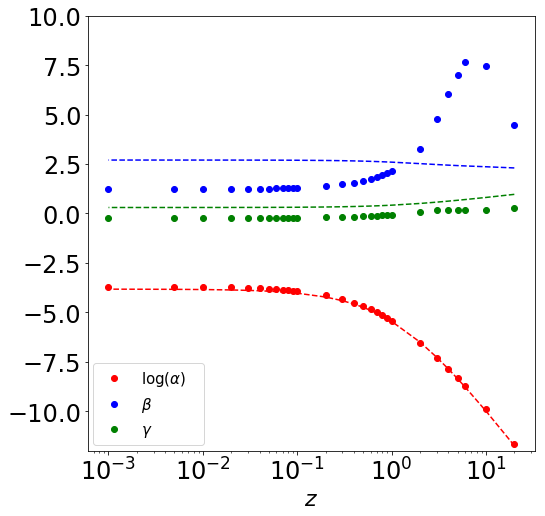

In [57]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot((z_list[kk:]),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot((z_list[kk:]),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot((z_list[kk:]),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot((z_list[kk:]),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot((z_list[kk:]),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot((z_list[kk:]),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,10)

plt.xlabel(r"$z$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('fitting_cs2_7_values_1.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

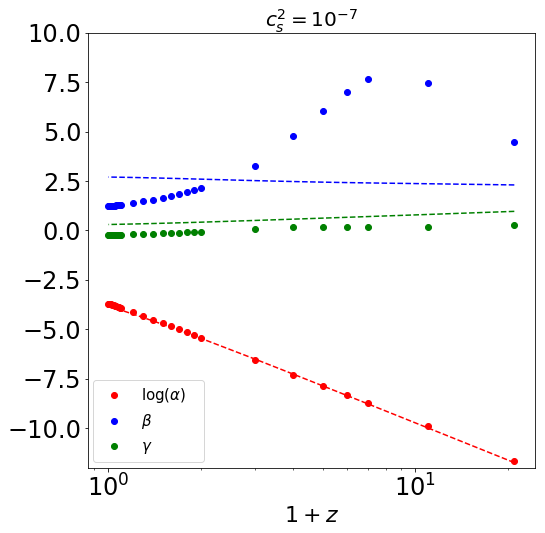

In [58]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot((z_list[kk:]+1),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot((z_list[kk:]+1),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot((z_list[kk:]+1),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot((z_list[kk:]+1),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot((z_list[kk:]+1),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot((z_list[kk:]+1),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,10)

plt.xlabel(r"$1+z$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')
plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('fitting_cs2_7_values_v3.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

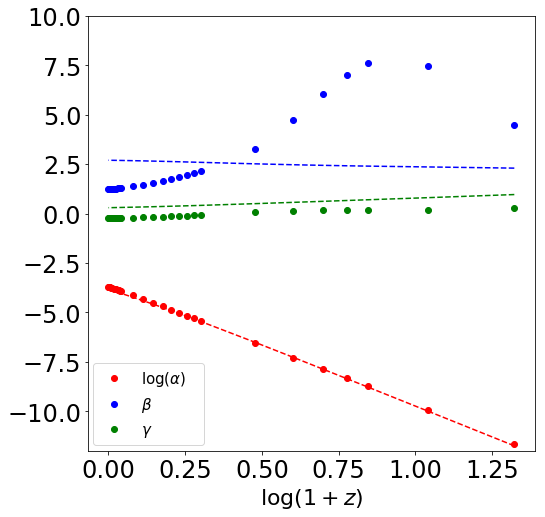

In [59]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot(np.log10(z_list[kk:]+1),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot(np.log10(z_list[kk:]+1),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot(np.log10(z_list[kk:]+1),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot(np.log10(z_list[kk:]+1),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot(np.log10(z_list[kk:]+1),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot(np.log10(z_list[kk:]+1),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,10)

plt.xlabel(r"$\log(1+z)$",fontsize=22)
# plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('fitting_cs2_7_values_v2.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

In [19]:
print(z_list[kk:],np.log(z_list[kk:]+1))

(array([  2.00000000e+01,   1.00000000e+01,   6.00000000e+00,
         5.00000000e+00,   4.00000000e+00,   3.00000000e+00,
         2.00000000e+00,   1.00000000e+00,   9.00000000e-01,
         8.00000000e-01,   7.00000000e-01,   6.00000000e-01,
         5.00000000e-01,   4.00000000e-01,   3.00000000e-01,
         2.00000000e-01,   1.00000000e-01,   9.00000000e-02,
         8.00000000e-02,   7.00000000e-02,   6.00000000e-02,
         5.00000000e-02,   4.00000000e-02,   3.00000000e-02,
         2.00000000e-02,   1.00000000e-02,   5.00000000e-03,
         1.00000000e-03,   0.00000000e+00]), array([  3.04452244e+00,   2.39789527e+00,   1.94591015e+00,
         1.79175947e+00,   1.60943791e+00,   1.38629436e+00,
         1.09861229e+00,   6.93147181e-01,   6.41853886e-01,
         5.87786665e-01,   5.30628251e-01,   4.70003629e-01,
         4.05465108e-01,   3.36472237e-01,   2.62364264e-01,
         1.82321557e-01,   9.53101798e-02,   8.61776962e-02,
         7.69610411e-02,   6.76586485e-

In [ ]:
np.lo2.00000000e+01

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.gca()
k_min=3
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.loglog(1+z_list[:],Best_fits_class[:,0])
# plt.loglog(1+z_list[:],Best_fits_class[:,0])

plt.loglog(1+z_list[:],Best_fits[:,0],"o")

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))

plt.show()

In [ ]:

l=0

plt.figure(figsize=(8,8))
ax = plt.gca()
k_min=4
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in [3,8,9,14,30]:
    x=(Gev_lin_phi_zall[i][k_min:,0]);
    [alpha, beta, gamma]=Best_fits[l]
    plt.semilogx(Gev_lin_phi_zall[i][k_min:,0], mu_kev_Hubble[i][k_min:]-1,"o")
    plt.semilogx(Gev_lin_phi_zall[i][k_min:,0],tanhyp(x,alpha, beta, gamma),color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i][k_min:,0], mu_class_Hubble[i][k_min:]-1,color=ColorsI[l],linestyle='dashed',lw=2.5)
    [alpha, beta, gamma]=Best_fits_class[l]
    plt.semilogx(Gev_lin_phi_zall[i][k_min:,0],tanhyp(x,alpha, beta, gamma),color=ColorsI[l],linestyle='dashed',lw=2.5)

    l=l+1
    #     plt.plot(Gev_lin_phi_zall[i+zrange*2][:,0], mu_kev_mid[i],color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i],color="brown",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
plt.legend(bbox_to_anchor=(0.8, 0.90,0.2, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)


plt.xlabel("k[h/Mpc]",fontsize=22)
plt.ylabel(r"$\mu(k,z)(c_s^2 =10^{-4})$",fontsize=26)
# plt.xlim(0.01,20.)
plt.xscale('log')
# plt.yscale('log')
# plt.savefig('mu_cs2_w09.jpg', format='jpg',dpi=400, bbox_inches='tight' )

# plt.grid(True)
plt.show()


# eta function

In [60]:
# def= phi -chi
psi_all = []
eta= []
for i in range(zrange*3)  :  
    phi_k = -np.sqrt(Gev_lin_phi_zall[i])
    psi_k = phi_k - np.sqrt(Gev_lin_chi[i])
    psi_all.append(psi_k);
    eta .append( phi_k/psi_k)

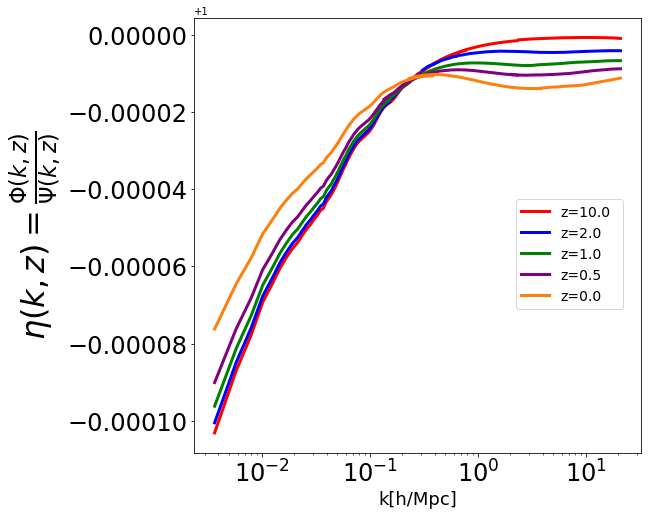

In [61]:

fig, axs = plt.subplots(figsize=(8,8))
plt.subplots_adjust(hspace=0)
kmax=31
l=0
# variance_large=0
# variance_mid=9
# variance_small=40
# kmax_skip_l=9.5
# kmax_skip_m=7.5
# kmax_skip_s=2
# kmax_num_l=np.int(596/kmax_skip_l)
# kmax_num_m=np.int(596/kmax_skip_m)
# kmax_num_s=np.int(596/kmax_skip_s)
# for i in [3,8,9,14,30]:
for i in [3,8,9,14,30]:

    if i==3:
        variance_large=1
        variance_mid=4
        variance_small=58
        kmax_skip_l=3
        kmax_skip_m=7.
        kmax_skip_s=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)

    if i==9:
        variance_large=1
        variance_mid=9
        variance_small=70
        kmax_skip_l=15
        kmax_skip_m=5.8
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)

        
    if i==8:
        variance_large=1
        variance_mid=8
        variance_small=7
        kmax_skip_l=15
        kmax_skip_m=52
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
                
    if i==14:
        variance_large=1
        variance_mid=8
        variance_small=50
        kmax_skip_l=16
        kmax_skip_m=7
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
    if i==30:
        variance_large=1
        variance_mid=14
        variance_small=89
        kmax_skip_l=6
        kmax_skip_m=4.2
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        

    axs.plot(Gev_lin_delta_m_zall[i][variance_large:kmax_num_l,0], eta[i][variance_large:kmax_num_l,1],
                  "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  
    axs.plot(Gev_lin_delta_m_zall[i+zrange][variance_mid:kmax_num_m,0], eta[i+zrange][variance_mid:kmax_num_m,1],
                  "-",color=ColorsI[l],lw=3.0 )  
    axs.plot(Gev_lin_delta_m_zall[i+zrange*2][variance_small:kmax_num_s,0], eta[i+zrange*2][variance_small:kmax_num_s,1],
                  "-",color=ColorsI[l],lw=3.0 )  

    l=l+1    
axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.72, 0.48, 0.24, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=18)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs.set_ylim(1-1.e-6,1-1.e-4)
# axs.set_ylim(4.e-6,1.e-4)
axs.set_xscale('log')
# axs.set_yscale('log')

axs.set_ylabel(r"${\eta(k,z)} = \frac{\Phi(k,z)}{\Psi(k,z)}$",fontsize=32)
# axs.set_ylim(-0.0001,0)
# plt.savefig('eta_1.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

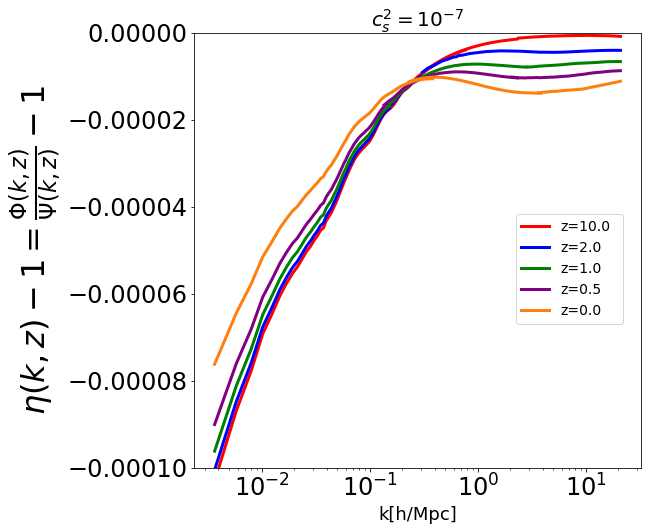

In [62]:

fig, axs = plt.subplots(figsize=(8,8))
plt.subplots_adjust(hspace=0)
kmax=31
l=0
# variance_large=0
# variance_mid=9
# variance_small=40
# kmax_skip_l=9.5
# kmax_skip_m=7.5
# kmax_skip_s=2
# kmax_num_l=np.int(596/kmax_skip_l)
# kmax_num_m=np.int(596/kmax_skip_m)
# kmax_num_s=np.int(596/kmax_skip_s)
# for i in [3,8,9,14,30]:
for i in [3,8,9,14,30]:

    if i==3:
        variance_large=1
        variance_mid=4
        variance_small=58
        kmax_skip_l=3
        kmax_skip_m=7.
        kmax_skip_s=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)

    if i==9:
        variance_large=1
        variance_mid=9
        variance_small=70
        kmax_skip_l=15
        kmax_skip_m=5.8
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)

        
    if i==8:
        variance_large=1
        variance_mid=8
        variance_small=7
        kmax_skip_l=15
        kmax_skip_m=52
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
                
    if i==14:
        variance_large=1
        variance_mid=8
        variance_small=50
        kmax_skip_l=16
        kmax_skip_m=7
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
    if i==30:
        variance_large=1
        variance_mid=14
        variance_small=89
        kmax_skip_l=6
        kmax_skip_m=4.2
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        

    axs.plot(Gev_lin_delta_m_zall[i][variance_large:kmax_num_l,0], eta[i][variance_large:kmax_num_l,1]-1,
                  "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  
    axs.plot(Gev_lin_delta_m_zall[i+zrange][variance_mid:kmax_num_m,0], eta[i+zrange][variance_mid:kmax_num_m,1]-1,
                  "-",color=ColorsI[l],lw=3.0 )  
    axs.plot(Gev_lin_delta_m_zall[i+zrange*2][variance_small:kmax_num_s,0], eta[i+zrange*2][variance_small:kmax_num_s,1]-1,
                  "-",color=ColorsI[l],lw=3.0 )  

    l=l+1    
axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.72, 0.48, 0.24, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=18)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs.set_ylim(1-1.e-6,1-1.e-4)
# axs.set_ylim(4.e-6,1.e-4)
axs.set_xscale('log')
# axs.set_yscale('log')

axs.set_ylabel(r"${\eta(k,z)}-1 = \frac{\Phi(k,z)}{\Psi(k,z)}-1$",fontsize=32)
axs.set_ylim(-0.0001,0)
plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.savefig('eta_1.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

In [ ]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
e = [0.5, 1., 1.5, 2.]
plt.errorbar(x, y, yerr=e, fmt='o')
plt.show()

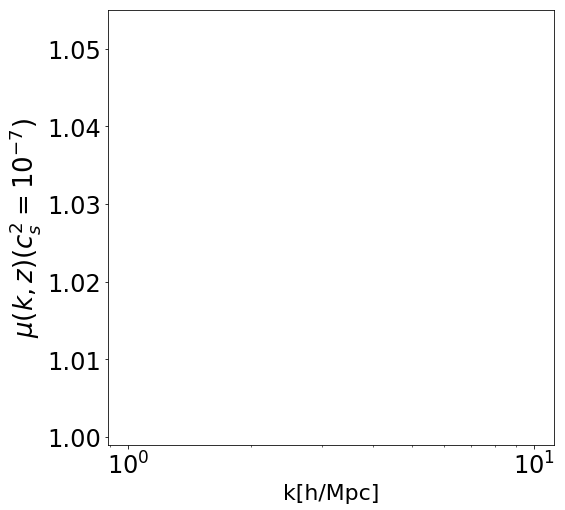

In [63]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class=[]
mu_kev=[]
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))

l=0
c_s=np.sqrt(1.e-7)
kmax=100
for i in [30]:
    if i==3:
        variance_large=1
        variance_mid=1
        variance_small=3
        kmax_skip_l=3
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)

    if i==8:
        variance_large=1
        variance_mid=6
        variance_small=80
        kmax_skip_l=15
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        
    if i==9:
        variance_large=1
        variance_mid=9
        variance_small=80
        kmax_skip_l=15
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        
    if i==14:
        variance_large=1
        variance_mid=8
        variance_small=80
        kmax_skip_l=16
        kmax_skip_m=1
        kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        
        
    if i==30:
        variance_large=0
        variance_mid=36
#         variance_small=80
        kmax_skip_l=3.8
        kmax_skip_m=1
#         kmax_skip_s=1
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
    ksound=H_list[i]/c_s/h;
#     x=1
#     plt.errorbar(Gev_lin_phi_zall[i][variance_large:kmax_num_l,0], mu_kev_Hubble[i][variance_large:kmax_num_l],yerr=Gev_lin_phi_zall[i][variance_large:kmax_num_l,3]*1.e9,fmt='o')
#     plt.plot(Gev_lin_phi_zall[i][variance_large:kmax_num_l,0], mu_class_Hubble[i][variance_large:kmax_num_l],color=ColorsI[l],linestyle='dashed',lw=2.5)

#     plt.plot(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0], mu_kev_large[i][variance_mid:kmax_num_m],".",color=ColorsI[l],lw=2.5)
#     plt.plot(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0], mu_class_large[i][variance_mid:kmax_num_m],color=ColorsI[l],linestyle='dashed',lw=2.5)
#     plt.plot(Gev_lin_phi_zall[i+zrange*2][variance_small:kmax_num_s,0], mu_kev_small[i][variance_small:kmax_num_s],color=ColorsI[l],linestyle='solid',lw=2.5)
#     plt.plot(Gev_lin_phi_zall[i+zrange*2][variance_small:kmax_num_s,0], mu_class_mid[i][variance_small:kmax_num_s],color=ColorsI[l],linestyle='dashed',lw=2.5)
#     plt.axvline(x=H_list[i]/c_s/h,color=ColorsI[l])    
    l=l+1

#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
plt.legend(bbox_to_anchor=(0.8, 0.90,0.2, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=22)
plt.ylabel(r"$\mu(k,z) (c_s^2 =10^{-7})$",fontsize=26)
# plt.xlim(0.01,20.)
plt.xscale('log')
# plt.yscale('log')
# plt.savefig('mu_cs7_w09.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.ylim(0.999,1.055)
# plt.grid(True)
plt.show()
